# Olist E-commerce Reviews
## Exploratory Data Analysis
Author: Lucas Iuri

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots

import utils

sns.set_style('whitegrid')

In [2]:
olist = pd.read_csv('./data/olist_main_dataset.csv', index_col=0)
olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto


In [3]:
print(olist.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english'],
      dtype='object')


## Response Distribution and Class Imbalance

We begin by checking the distribution of the response `review_score` and checking for class imbalance.

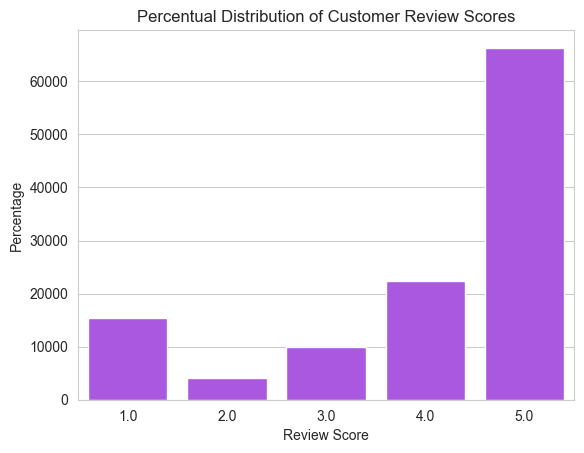

In [4]:
ax = sns.countplot(data=olist, x = 'review_score', color='#ad42f5', stat='count')
ax.set_title('Percentual Distribution of Customer Review Scores')
ax.set_xlabel('Review Score')
ax.set_ylabel('Percentage');

In [5]:
review_score_distribution = olist['review_score'].value_counts(normalize=True) * 100
print('Review Score Distribution:\n', review_score_distribution)


Review Score Distribution:
 review_score
5.0    56.153403
4.0    18.891033
1.0    13.058419
3.0     8.374384
2.0     3.522760
Name: proportion, dtype: float64


We can see a heavy imbalance on the reviews, with the majority being 5-star reviews, something to keep in mind for when we train our model.

## Geographical Distribution of Customers

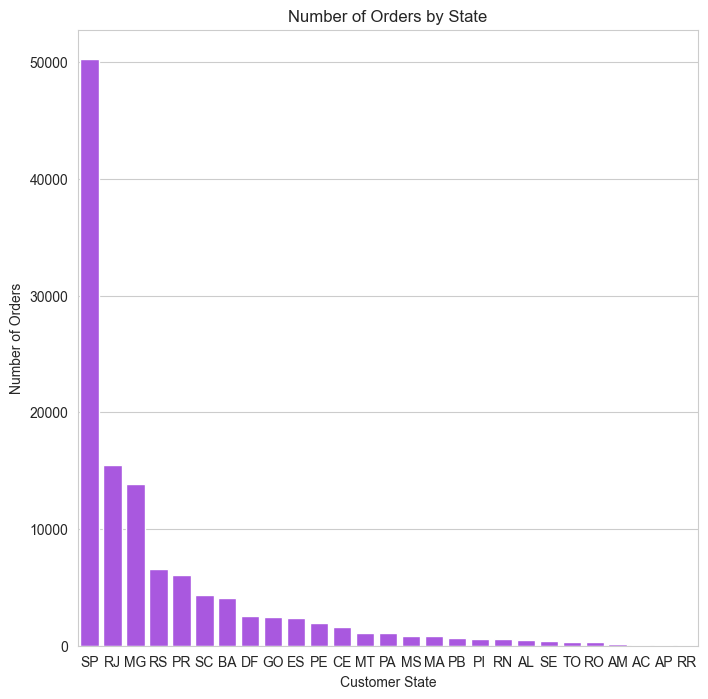

In [6]:
ax = subplots(figsize = (8,8))[1]

order_desc = olist['customer_state'].value_counts().index

sns.countplot(data=olist, x = 'customer_state', stat='count', order = order_desc, color='#ad42f5', ax = ax)
ax.set_title('Number of Orders by State')
ax.set_xlabel('Customer State')
ax.set_ylabel('Number of Orders');

## Order Trends Over Time

In [7]:
# Convert relevant columns to datetime

olist = utils.convert_datetime(olist)

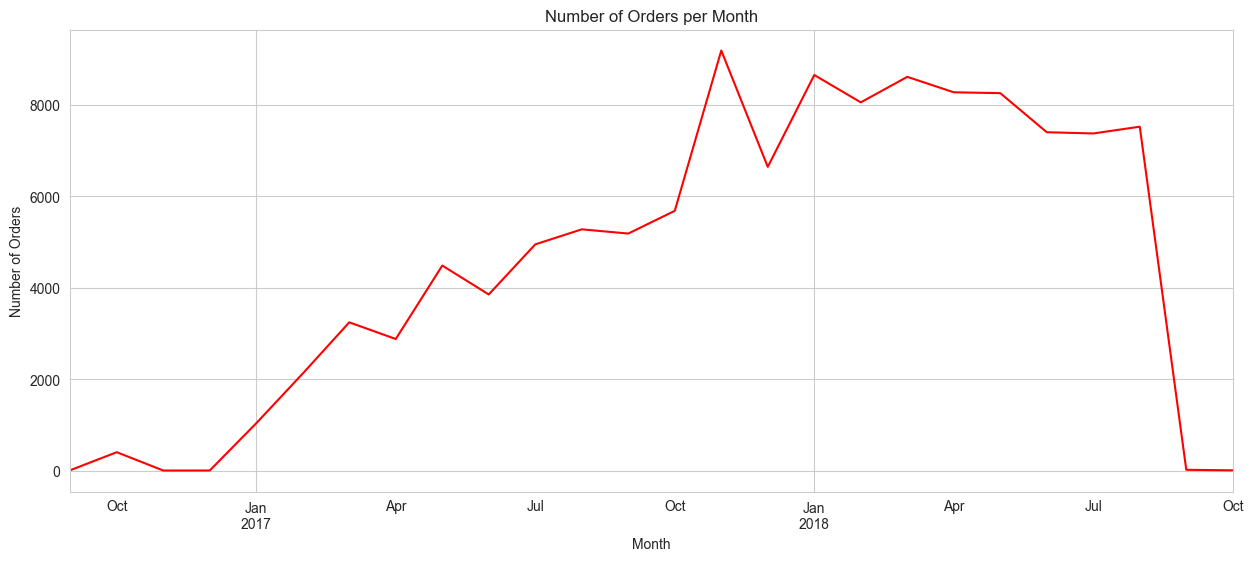

In [8]:
ax = olist.set_index('order_purchase_timestamp')['order_id'].resample('ME').count().plot(figsize=(15,6), c = 'r')
ax.set_title('Number of Orders per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Orders');

## Payment Methods Distribution

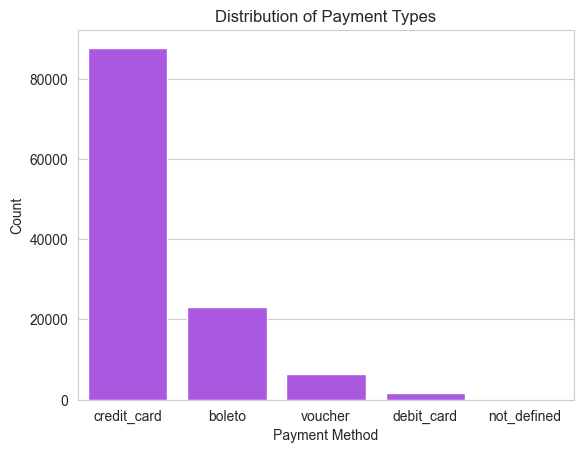

In [9]:
ax = sns.countplot(data = olist, x = 'payment_type', order=olist['payment_type'].value_counts().index, color='#ad42f5')
ax.set_title('Distribution of Payment Types')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count');